# NGHIA PHAN TRONG - FINAL PROJECT


# A.  IMPLEMENTATION

## A1. INITIAL STATISTICS

___
#### IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import glob
import missingno as msno
import string

___
#### NEWEST REVIEW DATASET

In [123]:
# Create the path to the data location
path = r'newestreview'
all_files = glob.glob(path + "/*.csv")

# Loading the data file by file and create a column named "category"
datalist = []
for filename in all_files:
    # extract the category name from the file name
    start = filename.find('FREE')
    end=filename.find('_apps.csv')
    category = filename[start+5:end]
    # Loading the data and attach it into the datalist
    df = pd.read_csv(filename)
    df['category']=category
    datalist.append(df)
    
# Merger all the data
frame = pd.concat(datalist, axis=0, ignore_index=True)
frame.head(2)

,appTitle,userName,date,score,text,category
0,Photomath,NaN,"March 8, 2019",5,nice,EDUCATION
1,Photomath,NaN,"March 8, 2019",4,very helpful,EDUCATION


***
#### OVERVIEW ABOUT DATASET

In [125]:
print(frame.shape)

(2715303, 6)


***
#### NULL VALUE REVIEW

In [126]:
def countnull(x):
    return np.sum(x.isnull())
def pernull(x):
    t=np.sum(x.isnull())
    return t/(x.count()+t)
Null_table=pd.DataFrame([frame.apply(pernull),frame.apply(countnull)],index=['NaN Percentage','NaN #'])
Null_table

,appTitle,userName,date,score,text,category
NaN Percentage,0.126031,0.082498,0.0,0.0,0.000067,0.0
NaN #,342211.000000,224007.000000,0.0,0.0,182.000000,0.0


#### DROP APPTITLE NAN

In [146]:
frame.dropna(subset=['appTitle'], inplace=True)
pd.DataFrame([frame.apply(pernull),frame.apply(countnull)],index=['NaN Percentage','NaN #'])


In [149]:
frame.shape

(2373092, 6)

#### 1. Drop duplicates and record how many unique reviews are collected?

In [148]:
print("Number of duplicated review:",np.sum(frame.duplicated()))
frame1 = frame.drop_duplicates(subset=None, keep='first', inplace=False)
answer1=len(frame1.index)
print("Number of unique review in the data:",answer1)

Number of duplicated review: 1231894
Number of unique review in the data: 1141198


#### NULL VALUE REVIEW



In [150]:
pd.DataFrame([frame1.apply(pernull),frame1.apply(countnull)],index=['NaN Percentage','NaN #'])

,appTitle,userName,date,score,text,category
NaN Percentage,0.0,0.134333,0.0,0.0,0.000065,0.0
NaN #,0.0,153300.000000,0.0,0.0,74.000000,0.0


___
#### 2. How many unique apps are in the dataset? 

In [159]:
frame2=frame1
frame2["appTitle_lower"]=frame2['appTitle'].str.lower()
answer2a=frame2['appTitle'].nunique()
print("NUMBER UNIQUE APPS:",answer2a)

NUMBER UNIQUE APPS: 87


C:\Users\VINCENT PHAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### 2b. How many apps in each of the 8 specified app categories?
#### 3. How many reviews exist in each of the eight app-categories

In [160]:
answer2b_3= frame2.groupby('category').agg({'appTitle_lower':'nunique','text':'size'})
answer2b_3.columns = ["Number_Apps_before_Test_Processing","Number_Review_before_Test_Processing"]
answer2b_3

,Number_Apps_before_Test_Processing,Number_Review_before_Test_Processing
category,,
EDUCATION,10,95916
ENTERTAINMENT,13,183518
FAMILY,10,125318
FINANCE,10,141158
GAME_ACTION,11,209497
HEALTH_AND_FITNESS,10,109865
LIFESTYLE,12,102945
MUSIC_AND_AUDIO,11,172981


___

#### DETAIL REVIEW DATASET

**Load Detail Review from load the detailreview from 2019-03-08 to 2019-04-21**

In [161]:
# Create the path to the data location
path = r'detailreview1'
all_files = glob.glob(path + "/*.csv")

# Loading the data file by file 
datalist2 = []
for filename in all_files:
    # Loading the data without the header which is create after merging all the detail review files
    df = pd.read_csv(filename,header=0,names=np.arange(0,43))
    datalist2.append(df)     
    
# Merger all the data
detailreview = pd.concat(datalist2, axis=0, ignore_index=True)
detailreview=detailreview.iloc[:,0:22]
names=['appTitle','summary','installs','minInstalls','score','ratings','reviews','free','offersIAP','size','androidVersionText','developerId','genreId','familyGenreId','contentRating','adSupported','released','updated','version','recentChanges','appId','url']
detailreview.columns=names

# Preview
detailreview.head(1)

,appTitle,summary,installs,minInstalls,score,ratings,reviews,free,offersIAP,size,...,genreId,familyGenreId,contentRating,adSupported,released,updated,version,recentChanges,appId,url
0,Duolingo: Learn Languages Free,"Learn English, Spanish, French, German, Italia...","100,000,000+",100000000,4.71985,7258463,2788387,True,True,Varies with device,...,EDUCATION,FAMILY_EDUCATION,Everyone,True,"May 29, 2013",1551998991000,Varies with device,"Our mascot owl, Duo, is trading in his usual d...",com.duolingo,https://play.google.com/store/apps/details?id=...


**Load Detail Review from load the detailreview 2019-05-09**

In [162]:
# Create the path to the data location
path = r'detailreview2'
all_files = glob.glob(path + "/*.csv")

# Loading the data file by file 
datalist2 = []
for filename in all_files:
    # Loading the data without the header which is create after merging all the detail review files
    df = pd.read_csv(filename,header=0,names=np.arange(0,21))
    datalist2.append(df)     
    
# Merger all the data
detailreview2 = pd.concat(datalist2, axis=0, ignore_index=True)
detailreview2=detailreview.iloc[:,0:10]
names=['title','appId','url','icon','developer','developerId','priceText','free','summary','scoreText']
detailreview2.columns=names

# Preview
detailreview2.head(1)

,title,appId,url,icon,developer,developerId,priceText,free,summary,scoreText
0,Duolingo: Learn Languages Free,"Learn English, Spanish, French, German, Italia...","100,000,000+",100000000,4.71985,7258463,2788387,True,True,Varies with device


#### APPEND CONTENT RATING FROM DETAIL REVIEW TO NEWEST REVIEW DATA

In [163]:
appTitle_CR=detailreview.drop_duplicates(subset ='appTitle',keep = 'first')[['appTitle','contentRating']]
frame2_sub=frame2
frame2_sub['contentRating']=frame2_sub['appTitle'].map(appTitle_CR.set_index('appTitle')['contentRating'])


C:\Users\VINCENT PHAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until



___
#### 4. What are the different contentRating groups in each app-category?

In [269]:
answer4=pd.DataFrame(frame2_sub.groupby('category')['contentRating'].unique())
answer4.columns=['Content Rating']
answer4

,Content Rating
category,
EDUCATION,[Everyone]
ENTERTAINMENT,"[Teen, Everyone, Mature 17+]"
FAMILY,"[Everyone 10+, Everyone]"
FINANCE,[Everyone]
GAME_ACTION,"[Everyone, Teen, Mature 17+]"
HEALTH_AND_FITNESS,[Everyone]
LIFESTYLE,"[Everyone, Mature 17+, Teen]"
MUSIC_AND_AUDIO,"[Teen, Everyone]"


___

#### 5. How many apps exist in each of these contentRating-sub-groups in each app-category?
#### 6. How many reviews in each contentRating-sub-groups in each app-category

In [167]:
answer5_6=pd.DataFrame(frame2_sub.groupby(['category','contentRating']).agg({'appTitle_lower':'nunique','text':'count'}))
answer5_6.columns=["Number_Apps_before_Test_Processing","Number_Review_before_Test_Processing"]
answer5_6

Number_Apps_before_Test_Processing  \
category           contentRating                                       
EDUCATION          Everyone                                       10   
ENTERTAINMENT      Everyone                                        4   
                   Mature 17+                                      1   
                   Teen                                            8   
FAMILY             Everyone                                        7   
                   Everyone 10+                                    3   
FINANCE            Everyone                                       10   
GAME_ACTION        Everyone                                        5   
                   Mature 17+                                      2   
                   Teen                                            4   
HEALTH_AND_FITNESS Everyone                                       10   
LIFESTYLE          Everyone                                       10   
                   Mature 17+                                      1   
                   Teen                                            1   
MUSIC_AND_AUDIO    Everyone                                        2   
                   Teen                                            9   

                                  Number_Review_before_Test_Processing  
category           contentRating                                        
EDUCATION          Everyone                                      95916  
ENTERTAINMENT      Everyone                                      14377  
                   Mature 17+                                     7278  
                   Teen                                         161853  
FAMILY             Everyone                                      77211  
                   Everyone 10+                                  48107  
FINANCE            Everyone                                     141129  
GAME_ACTION        Everyone                                      87560  
                   Mature 17+                                    29359  
                   Teen                                          92574  
HEALTH_AND_FITNESS Everyone                                     109859  
LIFESTYLE          Everyone                                      78200  
                   Mature 17+                                    21716  
                   Teen                                           3012  
MUSIC_AND_AUDIO    Everyone                                      22754  
                   Teen                                         150219

___
### A2. TEXT PROCESSING

#### CREATE COLUMN TO STORE THE ORIGINAL REVIEW

In [168]:
frame2['text']=frame2['text'].astype(str)
frame2['text_org']=frame2['text']


C:\Users\VINCENT PHAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\VINCENT PHAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


___
#### REMOVING PUNCTUATION AND NON-ASCII CHARACTERS

In [169]:
# remove non-ASCII
frame2['text'] = frame2['text'].str.replace('[^\x00-\x7F]','')
# remove punctuation
frame2['text'] = frame2['text'].str.replace('[{}]'.format(string.punctuation),'')


C:\Users\VINCENT PHAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\VINCENT PHAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


#### REMOVE MULTIPLE CHARACTERS OCCURING MORE THAN 2 TIMES

In [170]:
import re
def replaceRepeat(x):
    return re.sub(r'([a-z])\1{2,}', r'\1\1', x)
frame2['text']= frame2['text'].map(replaceRepeat)


C:\Users\VINCENT PHAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


#### REMOVE THE REVIEWS HAVING TWO OR LESS WORDS

In [171]:
def countword(x):
    return len(x.split(" ")) 
shortreview_index = frame2[frame2['text'].map(countword)<3].index.tolist()

In [172]:
frame3=frame2.drop(shortreview_index)

In [173]:
frame3.to_csv("newestdata_with_nonEng.csv")


In [174]:
frame3.shape

(759572, 9)

In [271]:
frame2.shape

(1141199, 9)

In [273]:
frame.shape

(2373092, 6)

#### REMOVE NON ENGLISH WORDS

**Due to low speed laptop the remove-non-English reviews are implemented in Google Colab. The code below is used to detect the non English words**

In [ ]:
import langid as ld
def enDect(x):
    return ld.classify(x)[0] !='en'
nonEn_index = frame3[frame3['text'].map(enDect)==True].index.tolist()
#frame4=frame3.drop(nonEn_index)

In [175]:
frame4 = pd.read_csv("newestdata_without_nonEng.csv",header=0)
frame4.columns=['index', 'appTitle', 'userName', 'date', 'score', 'text', 'category','appTitle_lower', 'text_org']
frame4.set_index('index')


,appTitle,userName,date,score,text,category,appTitle_lower,text_org
index,,,,,,,,
2,Photomath,NaN,"March 8, 2019",5,Great App Detailed answers Understandable answers,EDUCATION,photomath,Great App. Detailed answers. Understandable an...
6,Photomath,אוביידו אדריאנה,"March 8, 2019",5,Great tool for learning math I love it,EDUCATION,photomath,"Great tool for learning math, I love it!"
9,Photomath,Kaleb Wallis,"March 8, 2019",5,great if your in school or have homework,EDUCATION,photomath,great if your in school or have homework
10,Photomath,juana,"March 8, 2019",4,It is working amazing for me Now i love to fin...,EDUCATION,photomath,It is working amazing for me!!! Now i love to ...
11,Photomath,Duje Basic,"March 8, 2019",5,really great and you have all the explanations...,EDUCATION,photomath,really great and you have all the explanations...
13,Photomath,NaN,"March 8, 2019",5,IN LOVE WITH THIS APP YOU HELPED A LOT THANKYOU,EDUCATION,photomath,IN LOVE WITH THIS APP. YOU HELPED A LOT . THAN...
17,Photomath,The Hanika Homestead,"March 8, 2019",5,Very helpful for correcting papers or doing a ...,EDUCATION,photomath,"Very helpful for correcting papers, or doing a..."
18,Photomath,NaN,"March 8, 2019",4,can this app help with university maths,EDUCATION,photomath,can this app help with university maths?
19,Photomath,Tiffany Hohman,"March 8, 2019",5,Photo math is AWESOME,EDUCATION,photomath,Photo math is AWESOME!!!


#### DROPNA APPTITLE

In [177]:
frame4.dropna(subset=['appTitle'], inplace=True)
frame4.shape

(715455, 9)

***
#### 7a. Should we remove the reviews that contain two or less number of words?

1. It is possible for us to consider remove the reviews only containing two or less words. Due to the fact there are many scam reviews which can be made by the owers to promote the product or the competitors to degrade it. The significant evidence for this is the review is often very short

2. Besides the above reasons, one another reason is that if someone give a genuine review about a product with 5 stars or 1 stars, they usually have a long comment to express good/bad feeling about the product.
If a customer has no impression with the product, their review is utterly short. Therefore I suggest that we should remove less-than-two-word comments for 1-score and 5-score groups

#### 7b Remove the reviews that have two or less number of words
Implemented before the remove non-English review to reducing the work load for langid run 

***
#### 8. How many reviews exist in each of the eight app-categories?

#### The non App_Title is not removed to utilize the information from the data as much as possible  

In [178]:
answer8=pd.DataFrame(frame4.groupby('category')['text'].count())
answer8.columns=["Number_Review_after_Test_Processing"]
answer8=pd.concat([answer8,answer2b_3["Number_Review_before_Test_Processing"]],axis=1)
answer8["Deducing Ratio"]=(answer8.iloc[:,1]-answer8.iloc[:,0])/answer8.iloc[:,1]
answer8

,Number_Review_after_Test_Processing,Number_Review_before_Test_Processing,Deducing Ratio
category,,,
EDUCATION,67025,95916,0.301211
ENTERTAINMENT,103619,183518,0.435374
FAMILY,86410,125318,0.310474
FINANCE,93488,141158,0.337707
GAME_ACTION,109645,209497,0.476627
HEALTH_AND_FITNESS,77215,109865,0.297183
LIFESTYLE,65887,102945,0.359979
MUSIC_AND_AUDIO,112166,172981,0.351570


***
#### 9. How many reviews in each contentRating-sub-groups in each app-category

In [184]:
appTitle_CR=detailreview.drop_duplicates(subset ='appTitle',keep = 'first')[['appTitle','contentRating']]
frame4['contentRating']=frame4['appTitle'].map(appTitle_CR.set_index('appTitle')['contentRating'])
answer9=pd.DataFrame(frame4.groupby(['category','contentRating'])['text'].count())
answer9.columns=["Number_Review_after_Test_Processing"]
answer9=pd.concat([answer9,answer5_6["Number_Review_before_Test_Processing"]],axis=1)
answer9["Deducing Ratio"]=(answer9.iloc[:,1]-answer9.iloc[:,0])/answer9.iloc[:,1]
answer9

Number_Review_after_Test_Processing  \
category           contentRating                                        
EDUCATION          Everyone                                     67025   
ENTERTAINMENT      Everyone                                      9924   
                   Mature 17+                                    4742   
                   Teen                                         88953   
FAMILY             Everyone                                     50790   
                   Everyone 10+                                 35620   
FINANCE            Everyone                                     93488   
GAME_ACTION        Everyone                                     52603   
                   Mature 17+                                   11148   
                   Teen                                         45894   
HEALTH_AND_FITNESS Everyone                                     77215   
LIFESTYLE          Everyone                                     50068   
                   Mature 17+                                   13814   
                   Teen                                          2005   
MUSIC_AND_AUDIO    Everyone                                     15403   
                   Teen                                         96763   

                                  Number_Review_before_Test_Processing  \
category           contentRating                                         
EDUCATION          Everyone                                      95916   
ENTERTAINMENT      Everyone                                      14377   
                   Mature 17+                                     7278   
                   Teen                                         161853   
FAMILY             Everyone                                      77211   
                   Everyone 10+                                  48107   
FINANCE            Everyone                                     141129   
GAME_ACTION        Everyone                                      87560   
                   Mature 17+                                    29359   
                   Teen                                          92574   
HEALTH_AND_FITNESS Everyone                                     109859   
LIFESTYLE          Everyone                                      78200   
                   Mature 17+                                    21716   
                   Teen                                           3012   
MUSIC_AND_AUDIO    Everyone                                      22754   
                   Teen                                         150219   

                                  Deducing Ratio  
category           contentRating                  
EDUCATION          Everyone             0.301211  
ENTERTAINMENT      Everyone             0.309731  
                   Mature 17+           0.348447  
                   Teen                 0.450409  
FAMILY             Everyone             0.342192  
                   Everyone 10+         0.259567  
FINANCE            Everyone             0.337571  
GAME_ACTION        Everyone             0.399235  
                   Mature 17+           0.620287  
                   Teen                 0.504245  
HEALTH_AND_FITNESS Everyone             0.297145  
LIFESTYLE          Everyone             0.359744  
                   Mature 17+           0.363879  
                   Teen                 0.334329  
MUSIC_AND_AUDIO    Everyone             0.323064  
                   Teen                 0.355854

***
#### 10. What is the number of reviews for each score (score column)? 

In [301]:
answer10=pd.DataFrame(frame4.groupby('score')['text'].count())
answer10.columns = ['Number of Reviews']
answer10

,Number of Reviews
score,
1,124599
2,30756
3,41949
4,77671
5,440480


***
#### 11. How many apps exist in each score-sub-group?

In [284]:
answer11=pd.DataFrame(frame4.groupby('score')['appTitle_lower'].nunique())
answer11.columns =["Number of Apps"]
answer11

,Number of Apps
score,
1,86
2,86
3,86
4,86
5,86


***
#### 12. Compare the number of reviews for each score in a plot (Remember to normalize the numbers when you are comparing them).

In [199]:
answer12=answer10
answer12['Review_Mean_Max_Normalize']=(answer12["Number of Reviews"]-answer12["Number of Reviews"].min())/(answer12["Number of Reviews"].max()-answer12["Number of Reviews"].min())
answer12

,Number of Reviews,Review_Mean_Max_Normalize
score,,
1,124599,0.229040
2,30756,0.000000
3,41949,0.027318
4,77671,0.114504
5,440480,1.000000


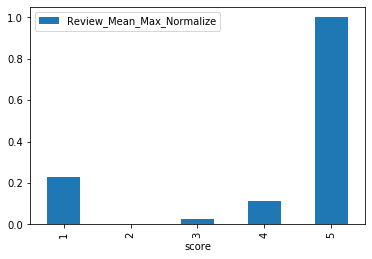

In [209]:
import matplotlib.pyplot as plt
answer12['score']=answer12.index
answer12.plot.bar(x='score',y='Review_Mean_Max_Normalize')
plt.savefig('answer12.png')

***
#### 13. What is the average length of the reviews in each score-sub-group?

In [210]:
frame4['Review Length']=frame4['text'].str.len()
answer13=pd.DataFrame(frame4.groupby('score')['Review Length'].mean())
answer13

,Review Length
score,
1,122.609668
2,145.257381
3,120.637584
4,90.273487
5,58.032798


In [286]:
answer11_12_13=pd.concat([answer11,answer12,answer13],axis=1)
answer11_12_13

,Number of Apps,Number of Reviews,Review_Mean_Max_Normalize,score,Review Length
score,,,,,
1,86,124599,0.229040,1,122.609668
2,86,30756,0.000000,2,145.257381
3,86,41949,0.027318,3,120.637584
4,86,77671,0.114504,4,90.273487
5,86,440480,1.000000,5,58.032798


***
#### 14. Compare the average length of reviews in each score-sub-group in the 8 app categories

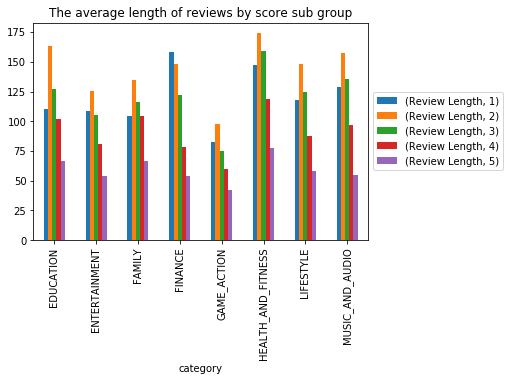

In [306]:
import matplotlib.pyplot as plt
answer14= pd.DataFrame(frame4.groupby(['category','score'])['Review Length'].mean())
answer14.unstack().plot(kind='bar',title="The average length of reviews by score sub group")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('answer14.png')

***
#### 15. Compare the number of reviews in each score-sub-group in the 8 app categories

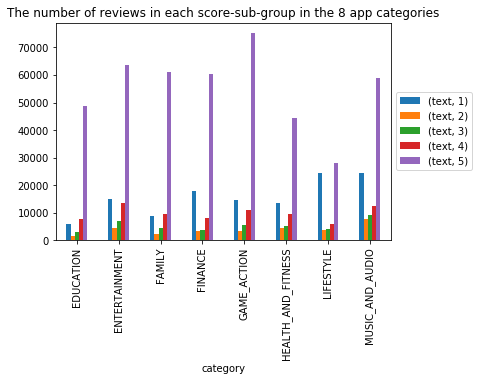

In [307]:
answer15= pd.DataFrame(frame4.groupby(['category','score'])['text'].count())
answer15.unstack().plot(kind='bar',title =  "The number of reviews in each score-sub-group in the 8 app categories")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('answer15.png')

***
#### 16. Compare the number of apps in each score-sub-group in the 8 app categories

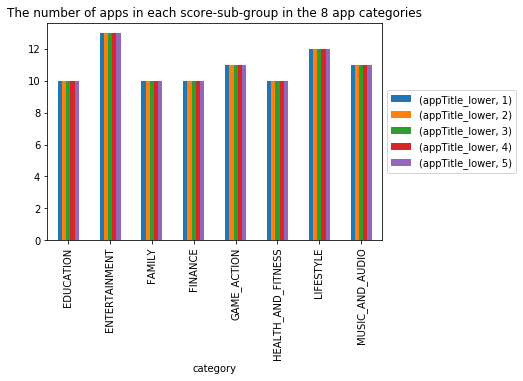

In [287]:
answer16= pd.DataFrame(frame4.groupby(['category','score'])['appTitle_lower'].nunique())
answer16.unstack().plot(kind='bar',title = "The number of apps in each score-sub-group in the 8 app categories")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('answer16.png')

***
#### 17. Is there any correlation between the length of the reviews and the score in each app-category?

In [288]:
answer17= pd.DataFrame(frame4.groupby('category')[['score','Review Length']].corr().iloc[0::2,-1])
answer17

,,Review Length
category,,
EDUCATION,score,-0.216306
ENTERTAINMENT,score,-0.283769
FAMILY,score,-0.180346
FINANCE,score,-0.433923
GAME_ACTION,score,-0.237467
HEALTH_AND_FITNESS,score,-0.286017
LIFESTYLE,score,-0.278002
MUSIC_AND_AUDIO,score,-0.351347


From the table we can see that, there is a negative correlation between the length of reviews and the score in each app- category, especially in Finance category.


***
#### 18. Find the evolution/changes of the star rating and length of reviews during time for each app category

**We can not use the date column in our database as there are many observations having un date format so we need to extract the date from the file name for this question** 

**First we need to reload the data newest review to get date information from the file name and attach that to frame4 database**

In [218]:
# Create the path to the data location
path = r'newestreview'
all_files = glob.glob(path + "/*.csv")

# Loading the data file by file and create a column named "category"
datalist = []
for filename in all_files:
    # extract the category name from the file name
    start = filename.find('FREE')
    end=filename.find('_apps.csv')
    category = filename[start+5:end]
    # extract the month information from the file name:
    monthinfo = filename[18:20]
    # Loading the data and attach it into the datalist
    df = pd.read_csv(filename)
    df['category']=category
    df['month']= monthinfo
    datalist.append(df)
    
# Merger all the data
frame_new = pd.concat(datalist, axis=0, ignore_index=True)
frame_new.head(1)


,appTitle,userName,date,score,text,category,month
0,Photomath,NaN,"March 8, 2019",5,nice,EDUCATION,03


In [219]:
# Removing all the rows which are not relevant
index_selection = list(frame4['index'])
frame_new=frame_new[frame_new.index.isin(index_selection)]
frame_new.head(1)

,appTitle,userName,date,score,text,category,month
2,Photomath,NaN,"March 8, 2019",5,Great App. Detailed answers. Understandable an...,EDUCATION,03


In [220]:
frame5=frame4
series1 = list(frame_new['month'])
frame5['month']=series1

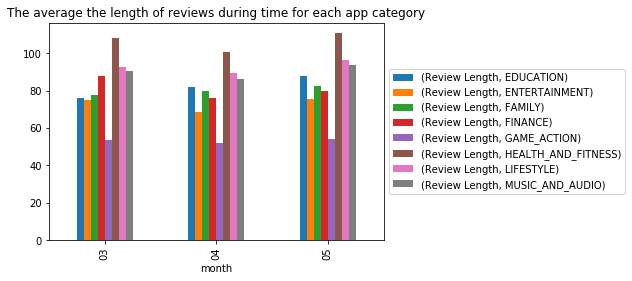

In [264]:
answer18=pd.DataFrame(frame5.groupby(['month','category'])['Review Length'].mean())
answer18.unstack().plot(kind='bar',title="The average the length of reviews during time for each app category")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('answer18_review.png')

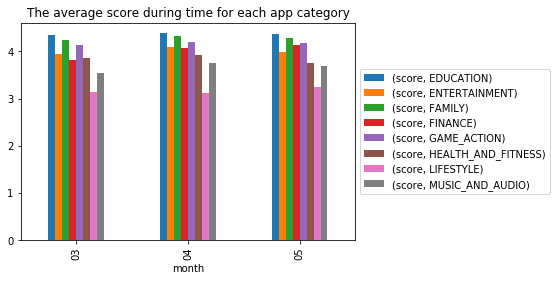

In [262]:
answer18_score=pd.DataFrame(frame5.groupby(['month','category'])['score'].mean())
answer18_score.unstack().plot(kind='bar',title="The average score during time for each app category")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('answer18_score.png')

***
#### 19. Compare your scores among the app categories. Do you see a difference between app categories?

**Random select the review**

In [130]:
grouprow_list= []
categorylist=list(frame5['category'].unique())

for i in categorylist:
    for j in range(1,6):
        grouprow=frame5[(frame5['score']==j) & (frame5['category']==i)].sample(5)
        grouprow_list.append(grouprow)
        
randomreview = pd.concat(grouprow_list, axis=0, ignore_index=True)
# the code is hidden to avoid of deleting the existing data
#randomreview.to_csv('Question19_ReviewSample.csv')

In [236]:
randomreview_Val = pd.read_csv("Question19_ReviewSample - ManualValidation.csv",header=0)
randomreview_Val.head(1)

,Unnamed: 0,index,appTitle,userName,date,score,Sentiment,Constructive,text,category,appTitle_lower,text_org,contentRating,Review Length,month
0,0,23381,Google Classroom,YG ENTERTAINMENT,29-Aug-18,1,-4,3,It did nothing,EDUCATION,google classroom,It did nothing,Everyone,14,3


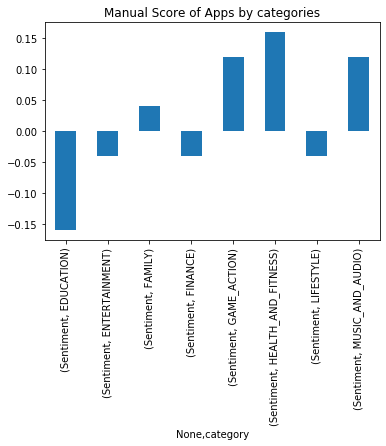

In [268]:
import matplotlib.pyplot as plt
answer19=pd.DataFrame(randomreview_Val.groupby(['category'])['Sentiment'].mean())
answer19.unstack().plot(kind='bar',title="Manual Score of Apps by categories")
plt.savefig('answer19.png')

**Conclusion**: In average app categories have close sentiment score via the manual rating and quite neutral with the values are close to 0.

### BACKUP FINAL DATA


In [239]:
frame5.to_csv("Data542_finaldata.csv")

***
***

# B. RESULT SUMMARY

#### 1. Drop duplicates and record how many unique reviews are collected?

In [240]:
print("Number of unique review in the data:",answer1)

Number of unique review in the data: 1141198


#### 2a. How many unique apps are in the dataset?

In [241]:
print("NUMBER UNIQUE APPS:",answer2a)

NUMBER UNIQUE APPS: 87


#### 2b. How many apps in each of the 8 specified app categories?
#### 3. How many reviews exist in each of the eight app-categories?

In [242]:
answer2b_3

,Number_Apps_before_Test_Processing,Number_Review_before_Test_Processing
category,,
EDUCATION,10,95916
ENTERTAINMENT,13,183518
FAMILY,10,125318
FINANCE,10,141158
GAME_ACTION,11,209497
HEALTH_AND_FITNESS,10,109865
LIFESTYLE,12,102945
MUSIC_AND_AUDIO,11,172981


#### 4. What are the different contentRating groups in each app-category?

In [270]:
answer4

,Content Rating
category,
EDUCATION,[Everyone]
ENTERTAINMENT,"[Teen, Everyone, Mature 17+]"
FAMILY,"[Everyone 10+, Everyone]"
FINANCE,[Everyone]
GAME_ACTION,"[Everyone, Teen, Mature 17+]"
HEALTH_AND_FITNESS,[Everyone]
LIFESTYLE,"[Everyone, Mature 17+, Teen]"
MUSIC_AND_AUDIO,"[Teen, Everyone]"


#### 5. How many apps exist in each of these contentRating-sub-groups in each app-category?
#### 6. How many reviews in each contentRating-sub-groups in each app-category

In [245]:
answer5_6

Number_Apps_before_Test_Processing  \
category           contentRating                                       
EDUCATION          Everyone                                       10   
ENTERTAINMENT      Everyone                                        4   
                   Mature 17+                                      1   
                   Teen                                            8   
FAMILY             Everyone                                        7   
                   Everyone 10+                                    3   
FINANCE            Everyone                                       10   
GAME_ACTION        Everyone                                        5   
                   Mature 17+                                      2   
                   Teen                                            4   
HEALTH_AND_FITNESS Everyone                                       10   
LIFESTYLE          Everyone                                       10   
                   Mature 17+                                      1   
                   Teen                                            1   
MUSIC_AND_AUDIO    Everyone                                        2   
                   Teen                                            9   

                                  Number_Review_before_Test_Processing  
category           contentRating                                        
EDUCATION          Everyone                                      95916  
ENTERTAINMENT      Everyone                                      14377  
                   Mature 17+                                     7278  
                   Teen                                         161853  
FAMILY             Everyone                                      77211  
                   Everyone 10+                                  48107  
FINANCE            Everyone                                     141129  
GAME_ACTION        Everyone                                      87560  
                   Mature 17+                                    29359  
                   Teen                                          92574  
HEALTH_AND_FITNESS Everyone                                     109859  
LIFESTYLE          Everyone                                      78200  
                   Mature 17+                                    21716  
                   Teen                                           3012  
MUSIC_AND_AUDIO    Everyone                                      22754  
                   Teen                                         150219

#### 7a. Should we remove the reviews that contain two or less number of words?

* 1. It is possible for us to consider remove the reviews only containing two or less words. Due to the fact there are many scam reviews which can be made by the owers to promote the product or the competitors to degrade it.  

* 2. Besides the above reasons, one another reason is that if someone give a genuine review about a product with 5 stars or 1 stars, they usually have a long comment to express good/bad feeling about the product.
If a customer has no impression with the product, their review is utterly short. Therefore I suggest that we should remove less-than-two-word comments for 1-score and 5-score groups

#### 7b Remove the reviews that have two or less number of words
Implemented before the remove non-English review to reducing the work load for langid run. The code below is used to removed the short reviews
The code is in hidden mode to avoid of running accidentally.

In [ ]:
#def countword(x):
#    return len(x.split(" ")) 
#shortreview_index = frame2[frame2['text'].map(countword)<3].index.tolist()
#frame3=frame2.drop(shortreview_index)

#### 8. How many reviews exist in each of the eight app-categories?

In [304]:
answer8

,Number_Review_after_Test_Processing,Number_Review_before_Test_Processing,Deducing Ratio
category,,,
EDUCATION,67025,95916,0.301211
ENTERTAINMENT,103619,183518,0.435374
FAMILY,86410,125318,0.310474
FINANCE,93488,141158,0.337707
GAME_ACTION,109645,209497,0.476627
HEALTH_AND_FITNESS,77215,109865,0.297183
LIFESTYLE,65887,102945,0.359979
MUSIC_AND_AUDIO,112166,172981,0.351570


#### 9. How many reviews in each contentRating-sub-groups in each app-category

In [303]:
answer9

Number_Review_after_Test_Processing  \
category           contentRating                                        
EDUCATION          Everyone                                     67025   
ENTERTAINMENT      Everyone                                      9924   
                   Mature 17+                                    4742   
                   Teen                                         88953   
FAMILY             Everyone                                     50790   
                   Everyone 10+                                 35620   
FINANCE            Everyone                                     93488   
GAME_ACTION        Everyone                                     52603   
                   Mature 17+                                   11148   
                   Teen                                         45894   
HEALTH_AND_FITNESS Everyone                                     77215   
LIFESTYLE          Everyone                                     50068   
                   Mature 17+                                   13814   
                   Teen                                          2005   
MUSIC_AND_AUDIO    Everyone                                     15403   
                   Teen                                         96763   

                                  Number_Review_before_Test_Processing  \
category           contentRating                                         
EDUCATION          Everyone                                      95916   
ENTERTAINMENT      Everyone                                      14377   
                   Mature 17+                                     7278   
                   Teen                                         161853   
FAMILY             Everyone                                      77211   
                   Everyone 10+                                  48107   
FINANCE            Everyone                                     141129   
GAME_ACTION        Everyone                                      87560   
                   Mature 17+                                    29359   
                   Teen                                          92574   
HEALTH_AND_FITNESS Everyone                                     109859   
LIFESTYLE          Everyone                                      78200   
                   Mature 17+                                    21716   
                   Teen                                           3012   
MUSIC_AND_AUDIO    Everyone                                      22754   
                   Teen                                         150219   

                                  Deducing Ratio  
category           contentRating                  
EDUCATION          Everyone             0.301211  
ENTERTAINMENT      Everyone             0.309731  
                   Mature 17+           0.348447  
                   Teen                 0.450409  
FAMILY             Everyone             0.342192  
                   Everyone 10+         0.259567  
FINANCE            Everyone             0.337571  
GAME_ACTION        Everyone             0.399235  
                   Mature 17+           0.620287  
                   Teen                 0.504245  
HEALTH_AND_FITNESS Everyone             0.297145  
LIFESTYLE          Everyone             0.359744  
                   Mature 17+           0.363879  
                   Teen                 0.334329  
MUSIC_AND_AUDIO    Everyone             0.323064  
                   Teen                 0.355854

#### 10. What is the number of reviews for each score (score column)? 

In [302]:
answer10

,Number of Reviews
score,
1,124599
2,30756
3,41949
4,77671
5,440480


####  11. How many apps exist in each score-sub-group?

In [299]:
answer11

,Number of Apps
score,
1,86
2,86
3,86
4,86
5,86


#### 12. Compare the number of reviews for each score in a plot (Remember to normalize the numbers when you are comparing them).

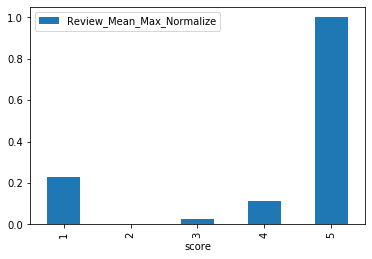

In [300]:
answer12.plot.bar(x='score',y='Review_Mean_Max_Normalize')

#### 13. What is the average length of the reviews in each score-sub-group?

In [305]:
answer13

,Review Length
score,
1,122.609668
2,145.257381
3,120.637584
4,90.273487
5,58.032798


#### 14. Compare the average length of reviews in each score-sub-group in the 8 app categories

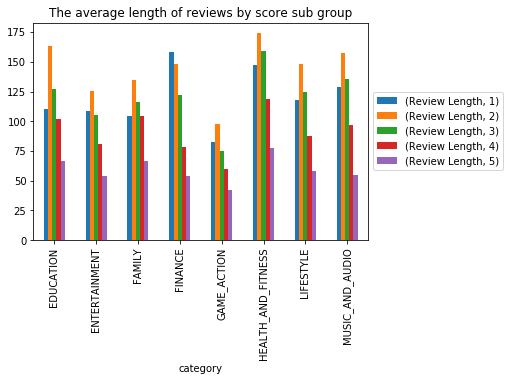

In [292]:
answer14.unstack().plot(kind='bar',title="The average length of reviews by score sub group")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


#### 15. Compare the number of reviews in each score-sub-group in the 8 app categories

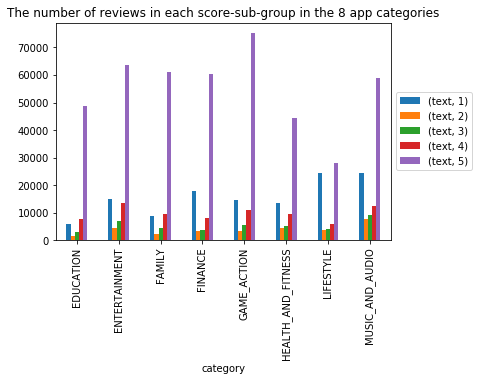

In [291]:
answer15.unstack().plot(kind='bar',title =  "The number of reviews in each score-sub-group in the 8 app categories")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#### 16. Compare the number of apps in each score-sub-group in the 8 app categories

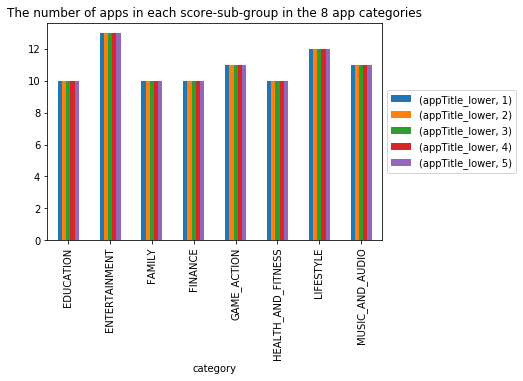

In [290]:
answer16.unstack().plot(kind='bar',title = "The number of apps in each score-sub-group in the 8 app categories")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#### 17. Is there any correlation between the length of the reviews and the score in each app-category?

From the table we can see that, there is a negative correlation between the length of reviews and the score in each app- category, especially in Finance category.

In [289]:
answer17

,,Review Length
category,,
EDUCATION,score,-0.216306
ENTERTAINMENT,score,-0.283769
FAMILY,score,-0.180346
FINANCE,score,-0.433923
GAME_ACTION,score,-0.237467
HEALTH_AND_FITNESS,score,-0.286017
LIFESTYLE,score,-0.278002
MUSIC_AND_AUDIO,score,-0.351347


#### 18. Find the evolution/changes of the star rating and length of reviews during time for each app category

We can not use the date column in our database as there are many observations having un date format so we need to extract the date from the file name for this question

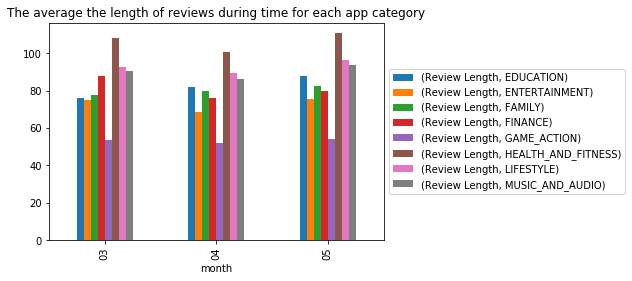

In [265]:
answer18.unstack().plot(kind='bar',title="The average the length of reviews during time for each app category")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


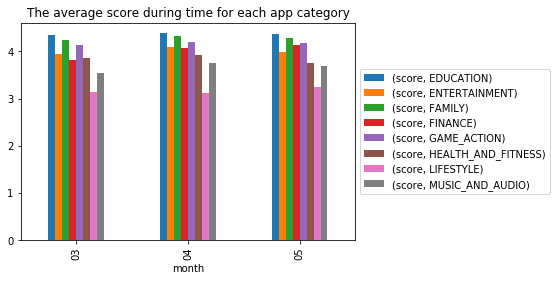

In [263]:
answer18_score.unstack().plot(kind='bar',title="The average score during time for each app category")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


#### 19. Compare your scores among the app categories. Do you see a difference between app categories?

**Conclusion: In average app categories have close sentiment score via the manual rating and quite neutral with the values are close to 0.**

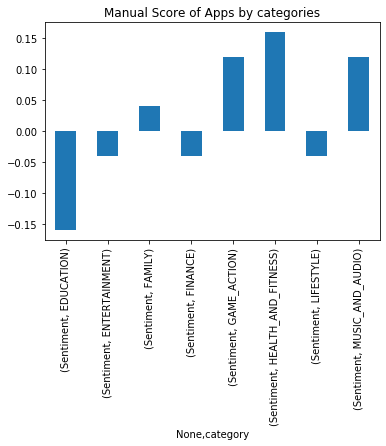

In [267]:
answer19.unstack().plot(kind='bar',title="Manual Score of Apps by categories")


# BONUS

In [90]:
from sklearn.cluster import DBSCAN
import numpy as np

In [91]:
frame5.head(1)

,index,appTitle,userName,date,score,text,category,appTitle_lower,text_org,contentRating,Review Length,month
0,2,Photomath,NaN,"March 8, 2019",5,Great App Detailed answers Understandable answers,EDUCATION,photomath,Great App. Detailed answers. Understandable an...,Everyone,49,03


In [96]:
framebonus=frame5
listcheck=list(frame5['text'])
clustering =  DBSCAN(eps=3, min_samples=2).fit(listcheck)


ValueError: Expected 2D array, got 1D array instead:
array=['Great App Detailed answers Understandable answers'
 'Great tool for learning math I love it'
 'great if your in school or have homework' ... 'I like it'
 'love this app'
 'The app was great and has a very nice selection of talented artists However ever since the 80 update on my Galaxy note 8 theres an extremely irritating crackling noise constantly going on whenever I try to listen with headphones Please for the love of the sky fix it I cant even listen to music on this app anymore because of how irritating it is'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.